In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') 

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#### 진료내역 데이터 가져오기

In [ ]:
doctor_data_1 = pd.read_csv('/content/gdrive/MyDrive/길벗_문서/github/LearnTextAnalysis/1장/data/HP_T20_2020_1.CSV', encoding='cp949')
doctor_data_2 = pd.read_csv('/content/gdrive/MyDrive/길벗_문서/github/LearnTextAnalysis/1장/data/HP_T20_2020_2.CSV', encoding='cp949')
doctor_data_3 = pd.read_csv('/content/gdrive/MyDrive/길벗_문서/github/LearnTextAnalysis/1장/data/HP_T20_2020_3.CSV', encoding='cp949')

In [ ]:
doctor_data_1.head(2)

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2020,29,3724043,1,17,41,2020-12-21,3,1,I109,E785,1,1,0.15,11540,1500,10040,0,2021-12-28
1,2020,29,3495225,1,17,41,2020-12-14,3,1,I109,E785,1,1,0.15,11540,1500,10040,7,2021-12-28


진료내역 데이터 concat() 메서드로 합치기

In [ ]:
doctor_data = pd.concat([doctor_data_1, doctor_data_2, doctor_data_3])

In [ ]:
target_cols = ['성별코드','연령대코드','진료과목코드','주상병코드','부상병코드']

In [ ]:
doctor_data_short = doctor_data[target_cols]

In [ ]:
print("2020년 진료행위 총 :",doctor_data_short.shape[0], "회")
doctor_data_short.head(2)

2020년 진료행위 총 : 11727248 회


,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드
0,1,17,1,I109,E785
1,1,17,1,I109,E785


#### 보조데이터 가져오기

In [ ]:
treat_code = pd.read_excel('/content/gdrive/MyDrive/길벗_문서/github/LearnTextAnalysis/1장/data/환자표본자료변수설명서_진료과목코드.xlsx', sheet_name="(별첨)코드정보").iloc[:,1:3]
treat_code.dropna(inplace=True)

treat_code.head(2)

,진료과목코드,Unnamed: 2
0,코드값,코드명
1,00,일반의


In [ ]:
treat_code = treat_code.iloc[1:-1,:]

In [ ]:
treat_code.head(3)

,진료과목코드,Unnamed: 2
1,00,일반의
2,01,내과
3,02,신경과


In [ ]:
treat_code = treat_code.rename(columns={"Unnamed: 2":"진료과목", '진료과목코드':"진료과목코드_str"})

In [ ]:
treat_code.head(3)

,진료과목코드_str,진료과목
1,00,일반의
2,01,내과
3,02,신경과


진료과목코드와 진료과목 데이터를 doctor_data_short에 적용

In [ ]:
doctor_data_short['진료과목코드_str']=doctor_data_short['진료과목코드'].apply(lambda x:str(x).zfill(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
doctor_data_short.reset_index(drop=True, inplace=True)

In [ ]:
doctor_data_short.head(1)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str
0,1,17,1,I109,E785,01


In [ ]:
treat_code.head(1)

,진료과목코드_str,진료과목
1,00,일반의


In [ ]:
treat_code_dict = {code:descript for code, descript in zip(treat_code['진료과목코드_str'], 
                                                          treat_code['진료과목'])}

In [ ]:
treat_code_dict

{'$': '진료과목코드오류',
 '00': '내과통합',
 '01': '소화기내과',
 '02': '순환기내과',
 '03': '호흡기내과',
 '04': '내분비.대사내과',
 '05': '신장내과',
 '06': '혈액종양내과',
 '07': '감염내과',
 '08': '알레르기내과',
 '09': '류마티스내과',
 '10': '산부인과',
 10: '산부인과',
 '11': '소아청소년과',
 11: '소아감염',
 '12': '안과',
 12: '소아내분비',
 '13': '이비인후과',
 '14': '피부과',
 '15': '비뇨기과',
 '16': '영상의학과',
 '17': '방사선종양학과',
 '18': '병리과',
 '19': '진단검사의학과',
 '20': '결핵과',
 '21': '재활의학과',
 '22': '핵의학과',
 '23': '가정의학과',
 '24': '응급의학과',
 '25': '직업환경의학과',
 '26': '예방의학과',
 '49': '치과',
 '50': '구강악안면외과',
 '51': '치과보철과',
 '52': '치과교정과',
 '53': '소아치과',
 '54': '치주과',
 '55': '치과보존과',
 '56': '구강내과',
 '57': '영상치의학과',
 '58': '구강병리과',
 '59': '예방치과',
 '60': '치과소계',
 '80': '한방내과',
 '81': '한방부인과',
 '82': '한방소아과',
 '83': '한방안·이비인후·피부과',
 '84': '한방신경정신과',
 '85': '침구과',
 '86': '한방재활의학과',
 '87': '사상체질과',
 '88': '한방응급',
 '90': '한방소계',
 '99': '해당사항없음',
 99: '해당사항없음',
 'AA': '기관단위',
 '코드값': '코드명'}

In [ ]:
doctor_data_short['진료과목'] = doctor_data_short['진료과목코드_str'].apply(lambda x:treat_code_dict[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
doctor_data_short.head(2)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,총처방일수,심결본인부담금,진료과목코드_str,진료과목
0,1,17,1,I109,E785,0,1500,01,소화기내과
1,1,17,1,I109,E785,7,1500,01,소화기내과


In [ ]:
doctor_data_short['진료과목'].unique()

array(['소화기내과', '가정의학과', '이비인후과', '신장내과', '피부과', '내분비.대사내과', '안과', '비뇨기과',
       '호흡기내과', '류마티스내과', '순환기내과', '소아청소년과', '응급의학과', '산부인과', '감염내과',
       '재활의학과', '혈액종양내과', '결핵과', '내과통합', '영상의학과', '직업환경의학과', '예방의학과',
       '진단검사의학과', '방사선종양학과', '핵의학과', '알레르기내과', '구강악안면외과', '치과보존과', '병리과',
       '치과보철과', '침구과', '치주과'], dtype=object)

In [ ]:
print("2020년 진료과목별 진료횟수 Top20")
doctor_data_short['진료과목'].value_counts()[:20]

2020년 진료과목별 진료횟수 Top20


소화기내과       3862137
신장내과        2109860
이비인후과        965156
안과           830926
피부과          625814
내분비.대사내과     404613
소아청소년과       399236
산부인과         395229
호흡기내과        375525
가정의학과        346533
비뇨기과         326217
혈액종양내과       263112
순환기내과        235572
류마티스내과       199868
재활의학과        155763
응급의학과        100935
내과통합          47631
감염내과          30657
영상의학과         17239
알레르기내과        16529
Name: 진료과목, dtype: int64

In [ ]:
x_hospitals = list(doctor_data_short['진료과목'].value_counts().index)
y_hos_values = doctor_data_short['진료과목'].value_counts().values

<BarContainer object of 32 artists>

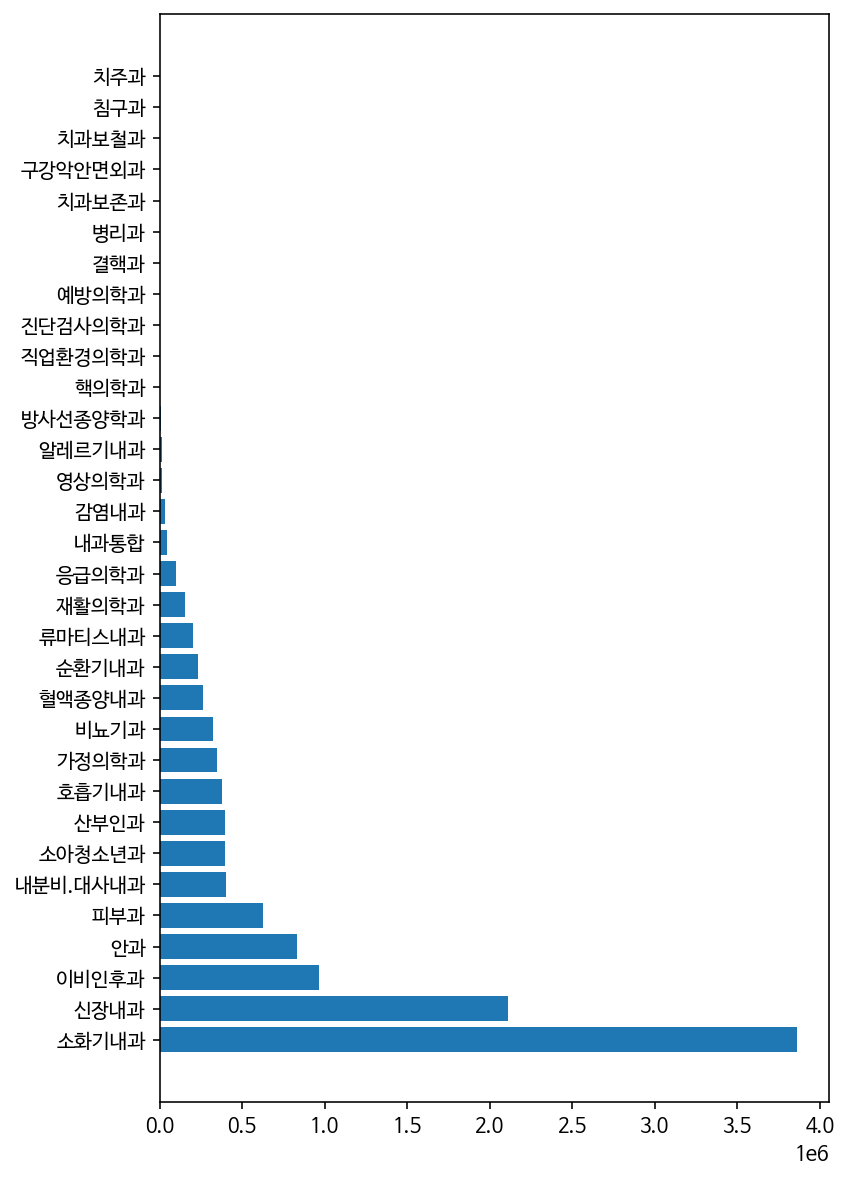

In [ ]:
plt.figure(figsize=(6, 10))
plt.barh(x_hospitals, y_hos_values)

보조데이터 상병코드 가져오기

In [ ]:
disease_code = pd.read_excel('/content/gdrive/MyDrive/길벗_문서/github/LearnTextAnalysis/1장/data/배포용 상병마스터 파일(외부용)_0601_주상병코드.xlsx',
                             sheet_name = '상병분류기호(완전코드)', header=9)

In [ ]:
disease_code.head(2)

,상병기호,한글명,영문명,완전코드구분,주상병사용구분,법정감염병구분,성별구분,상한연령,하한연령,양·한방구분,부가정보 변경내역
0,A000,비브리오 콜레라 01 콜레라형균에 의한 콜레라,"Cholera due to Vibrio cholerae 01, biovar chol...",NaN,NaN,제2급,NaN,NaN,NaN,양·한방 공통,NaN
1,A000,고전적 콜레라,Classical cholera,NaN,NaN,NaN,NaN,NaN,NaN,양·한방 공통,NaN


In [ ]:
disease_code = disease_code.iloc[:,:2]

In [ ]:
disease_code['주상병코드']=disease_code['상병기호']

In [ ]:
disease_code.head(2)

,상병기호,한글명,주상병코드
0,A000,비브리오 콜레라 01 콜레라형균에 의한 콜레라,A000
1,A000,고전적 콜레라,A000


In [ ]:
ill_code_dict = {code:descript for code, descript in zip(disease_code['주상병코드'], 
                                                          disease_code['한글명'])}

In [ ]:
print(doctor_data_short.shape)
doctor_data_short.head(2)

(11727248, 6)


,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str
0,1,17,1,I109,E785,01
1,1,17,1,I109,E785,01


In [ ]:
illness = []
for i in doctor_data_short['주상병코드']:
    try:
        ill_name = ill_code_dict[i]
        illness.append(ill_name)
    except:
        illness.append("알수없음")

In [ ]:
doctor_data_short['진단병명'] = illness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(doctor_data_short.shape)
doctor_data_short.head(2)

(11727248, 7)


,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,진료과목코드_str,진단병명
0,1,17,1,I109,E785,01,고혈압(동맥성)(본태성)(원발성)(전신)
1,1,17,1,I109,E785,01,고혈압(동맥성)(본태성)(원발성)(전신)


In [ ]:
def findSex(num):
    """1은 남자 의미"""
    if num==1:
        return "남"
    else:
        return "여"

In [ ]:
def ageCode(num):
    """연령대 분류"""
    if (num == 1) or (num == 2):
        return "9세미만"
    elif (num == 3) or (num == 4):
        return "10대"
    elif (num == 5) or (num == 6):
        return "20대"
    elif (num == 7) or (num == 8):
        return "30대"
    elif (num == 9) or (num == 10):
        return "40대"
    elif (num == 11) or (num == 12):
        return "50대"
    elif (num == 13) or (num == 14):
        return "60대"
    elif (num == 15) or (num == 16):
        return "70대"
    elif num == 17:
        return "80대"
    else:
        return "80대이상"

In [ ]:
doctor_data_short['성별']=doctor_data_short['성별코드'].apply(lambda x:findSex(num=x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
doctor_data_short['연령대']=doctor_data_short['연령대코드'].apply(lambda x:ageCode(num=x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
doctor_data_short.head(3)

,성별코드,연령대코드,진료과목코드,주상병코드,부상병코드,총처방일수,심결본인부담금,진료과목코드_str,진료과목,진단병명,성별,연령대
0,1,17,1,I109,E785,0,1500,01,소화기내과,고혈압(동맥성)(본태성)(원발성)(전신),남,80대
1,1,17,1,I109,E785,7,1500,01,소화기내과,고혈압(동맥성)(본태성)(원발성)(전신),남,80대
2,2,18,1,I109,I251,30,1500,01,소화기내과,고혈압(동맥성)(본태성)(원발성)(전신),여,80대이상


In [ ]:
doctor_data_short.to_csv('/content/gdrive/MyDrive/길벗_문서/github/LearnTextAnalysis/1장/data/2020년_진료정보.csv', index=False)

In [ ]:
doctor_data_short['진료과목'].value_counts()

소화기내과       3862137
신장내과        2109860
이비인후과        965156
안과           830926
피부과          625814
내분비.대사내과     404613
소아청소년과       399236
산부인과         395229
호흡기내과        375525
가정의학과        346533
비뇨기과         326217
혈액종양내과       263112
순환기내과        235572
류마티스내과       199868
재활의학과        155763
응급의학과        100935
내과통합          47631
감염내과          30657
영상의학과         17239
알레르기내과        16529
방사선종양학과       11106
핵의학과           2403
직업환경의학과        2095
진단검사의학과        1396
예방의학과           914
결핵과             635
병리과              66
치과보존과            58
구강악안면외과          15
치과보철과             6
침구과               1
치주과               1
Name: 진료과목, dtype: int64

In [ ]:
doctor_data_short.shape

(11727248, 12)